In [40]:
from loader.loader import get_cifar100, get_data_loader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from loader.loader import transforms_dict
import torch 
from matplotlib.pyplot import cm

class Dummy():
    data_dir = "../data"

dummy = Dummy()

# train_data, val_data = get_cifar100(dummy)
train_data = datasets.CIFAR100(
        root=dummy.data_dir,
        train=True,
        transform=transforms.Compose( [transforms.ToTensor(), transforms_dict["cifar100_resnet"]] ),
        # transform=transforms.Compose( [transforms.ToTensor(), transforms_dict["cheap_mnist_resnet"]],
        #                              ),
        # transform=transforms.ToTensor(),
        download=True
    )

train_load = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=False, num_workers=1)

print(len(train_data))

Files already downloaded and verified
50000


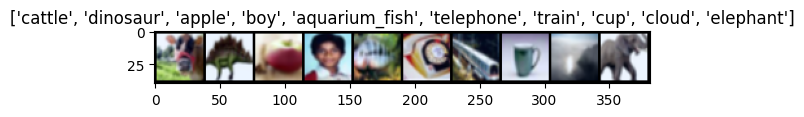

In [41]:
def show(inp, label):
    fig = plt.gcf()
    plt.imshow(inp.permute(1,2,0), vmin=0, vmax=1)
    plt.title(label)

for images, labels in train_load:
    for i in range(10):
        min_x = torch.min(images[i])
        max_x = torch.max(images[i])
        
        images[i] = (images[i] - min_x) / (max_x - min_x)
    labels = labels[:10] 
    grid_img = make_grid(images[:10], nrow=10)

    # plt.imshow(grid_img.permute(1, 2, 0))
    inv_map = {v: k for k, v in train_data.class_to_idx.items()}
    show(grid_img, [inv_map[label.item()] for label in labels])
    break

